#Pandas
 pandas has two data types 
    
1.   series = single column data array,
2.   dataframe = contains multiple series of data



In [ ]:
# data preparation
import csv
invest = [10,12,13,15,19,23,25,27,32,34,37,40,41.5,45]
sales  = [20,24,22,26,33,32,38,44,45,51,53,55,60,55]

n = len(invest)
with open("sales.csv", 'w') as f:  ## equivalent to f=open() and f.close
    writer = csv.writer(f)
    writer.writerow(["id", "invest", "sales"])
    for i in range(n):
        writer.writerow([i+1, invest[i], sales[i]])

In [ ]:
import matplotlib.pyplot as data_plt
import matplotlib.pyplot as error_plt
import numpy as np
import pandas as pd

class Simple_Linear_Regression_Modle:
    #variables
    x=None
    y=None
    y_predicted=None ##y = mx +c
    
    slope=0          ## m
    intercept=0      ## c
    iter=1000
    learning_rate=.0001
    error="mse"
    mean_error_per_iteration=[]

    filePath=None
    num_of_instances=None
    colums_in_file=None


    def __init__(self):
        print("Model object created")
    
    
    #methods
    def loadData_csv(self, filePath, train_col=None, labels_col=None):
        self.filePath=filePath

        df = pd.read_csv(self.filePath)
        self.colums_in_file = df.columns

        if train_col!=None:
            self.x = np.array(df[train_col])
        else:
            self.x = np.array(df[ df.columns[1] ])
        if labels_col!=None:
            self.y = np.array(df[labels_col])
        else:
            self.y = np.array(df[ df.columns[-1] ])

        self.num_of_instances=len(self.x)


    def fileInfo(self):
        if self.filePath != None:
            print(self.filePath, self.colums_in_file, "#instances",self.num_of_instances)
        else:
            print("No file found")

    
    def showData(self):
        print("     x  ","     y  ")
        for i in range( len(self.x) ):
            print(format(self.x[i], "8.2f"), format(self.y[i], "8.2f")  )
    

    def fit(self, m=None,c=None,iter=None,learning_rate=None,error=None):
        if self.filePath == None:
            print("No file found")
        else:
            if m!=None:
                self.slope=m
            if c!=None:
                self.intercept=c
            if iter!=None:
                self.iter=iter
            if learning_rate!=None:
                self.learning_rate=learning_rate
            if error!=None:
                if error=="mse" or error=="mae":
                    self.error=error
                else:
                    print("unsupported error, using deafult=",self.error)
            print("model params:",self.slope,self.intercept,self.iter,self.learning_rate,self.error)

            m = self.slope
            c = self.intercept

            # performing Gradient Descent
            for i in range(self.iter):
                #Predicting y_hat using current value of m and c
                y_hat = m * self.x + c  ## Calculating predicted value for every x, using current value of m & c

                ## Calculating error for the current predicted values
                error_values = ( self.y - y_hat)
                if self.error=="mae":
                    self.mean_error_per_iteration.append( sum(np.absolute(error_values))/n )
                else:
                    self.mean_error_per_iteration.append( sum(np.square(error_values))/n ) 
                
                #calculating gradient 
                dm = (-2/n) * sum( (self.y - y_hat)*self.x ) ## gradient of Error w.r.t. m
                dc = (-2/n) * sum( self.y - y_hat ) # gradient of Error w.r.t. c
                
                #update m & c
                m = m - self.learning_rate*dm
                c = c - self.learning_rate*dc
                #print("m = ",m ,"c = ", c)
            self.slope = m
            self.intercept = c
            
            #make prediction using the learned line
            self.y_predicted = self.slope*self.x + self.intercept

        return self.slope, self.intercept, self.mean_error_per_iteration[-1]


    def plotGraph(self):
        ## graphical presentation of the data and the learned line
            ## data
            data_plt.scatter(self.x, self.y)
            ## line
            x1=min(self.x)
            x2=max(self.x)
            y1=min(self.y_predicted)
            y2=max(self.y_predicted)
            data_plt.plot([x1, x2], [y1, y2], color = "green")
            data_plt.show()
    
    
    def plotError(self):
        ## plotting the error per iteration
            error_plt.plot(range(0,len(self.mean_error_per_iteration[0:100])), self.mean_error_per_iteration[0:100])
            error_plt.show()
        



model = Simple_Linear_Regression_Modle()
model.loadData_csv("sales.csv", train_col="invest", labels_col="sales")
slope, intercept, cost=model.fit(m=0,c=0,iter=10000,learning_rate=.001,error="mse")

print("Slope=", slope, "Intercept=", intercept, "Cost=", cost)

# model.plotGraph()
# model.plotError()

Model object created
model params: 0 0 10000 0.001 mse
Slope= 1.1593635815527052 Intercept= 8.861459139428833 Cost= 6.61487287184805


In [ ]:
import pandas as pd

df = pd.read_csv("iris.data")
df.to_csv("iris.csv")
df.head()

,sepal_length,sepal width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


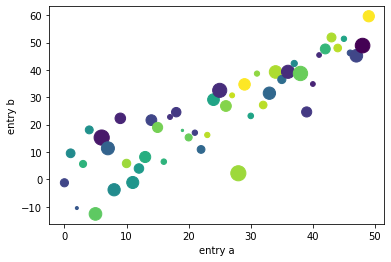

In [ ]:
import matplotlib.pyplot as plt

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()